<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2023</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [75]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [76]:
data = pd.read_csv('../train.csv')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [78]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [79]:
# 1: посмотреть на случайные строчки

data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [80]:
# 2: Проверка таблицы на наличие незаполненных данных

np.sum(data.isna())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [81]:
# Просмотр типов данных каждой колонки

data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

---
(Студент): Колонка **TotalSpent** заполнена строками. Необходимо преобразовать их в численные значения

In [82]:
try:
    data.iloc['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
except Exception as inst:
    print("Что-то пошло не так")
    print("Ошибка: " + inst.args[0])

Что-то пошло не так
Ошибка: Unable to parse string " " at position 1048


---
(Студент): в данной колонке имеются строки, которые нельзя преобразовать в численный тип

In [83]:
np.sum(pd.to_numeric(data['TotalSpent'], errors = 'coerce').isna())

9

---
(Студент): непреобразуемых строк относительно мало, поэтому можно выбросить их

In [84]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')

data = data.dropna()

In [85]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [13]:
import seaborn as sns
sns.set(font_scale = 1.0)

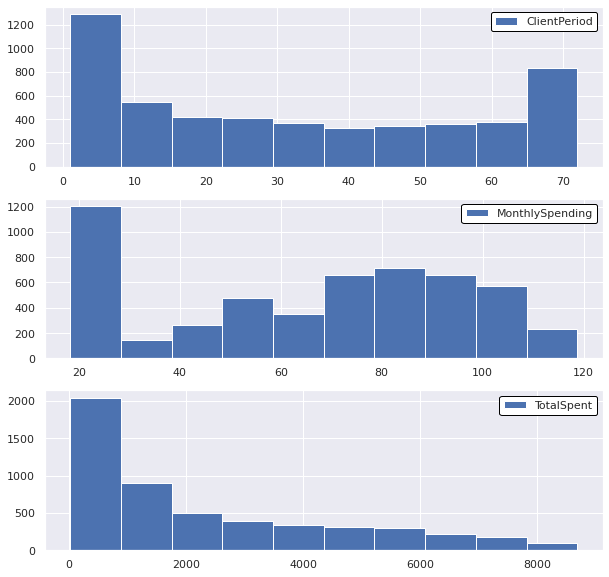

In [14]:
# 1.1: Постройка гистограмм численных признаков

fig, ax = plt.subplots(3, 1, figsize = (10, 10))

for i, col in enumerate(num_cols):
    count, bins = np.histogram(data[col].values)
    ax[i].hist(bins[:-1], bins, weights = count, label = col)
    legend_box = ax[i].legend(framealpha = 1).get_frame()
    legend_box.set_edgecolor('black')
    legend_box.set_facecolor('white')
plt.show()

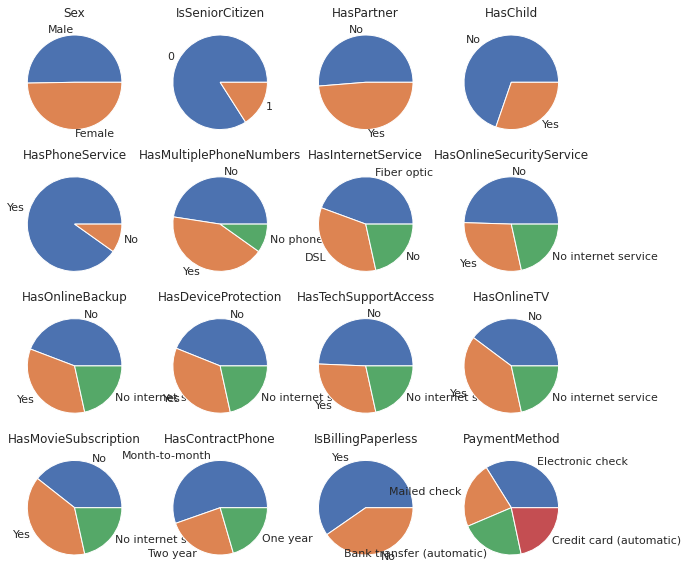

In [15]:
# 1.2: Построение диаграмм для категориальных данных

fig, ax = plt.subplots(4, 4, figsize = (10, 10))

ax = ax.ravel()

for i, col in enumerate(cat_cols):

    stata = data[col].value_counts()
    
    ax[i].set_title(col)
    ax[i].pie(stata.values, labels = stata.index)
    
plt.show()

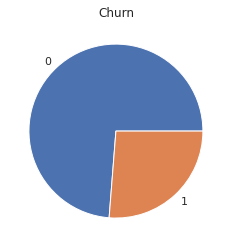

In [16]:
# 2: Проверить, является ли таргет класс несбалансированной

stata = data[target_col].value_counts()

fig = plt.subplot()

fig.set_title(target_col)
fig.pie(stata.values, labels = stata.index)
plt.show()

In [17]:
# 3: Эксперименты с визуализацией



(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [18]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

---
(Студент): Необходимо будет нормировать данные после разделения данных для валидаций и для обучения, чтобы изолировать норму обучаемой выборки от валидационной

In [86]:
# 1: Подготовка данных
# 1.1: One-hot-encoding

dummies = pd.get_dummies(data[cat_cols], drop_first = True)

X = pd.concat([data[num_cols], dummies], axis = 1)
y = data[target_col]

X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [87]:
# 1.2: Разделение выборки для обучения и валидаций

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [99]:
X_train.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2983,69,24.6,1678.05,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
4163,22,50.6,1073.30,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0


In [ ]:
X_

/home/clou/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/clou/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/clou/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/clou/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

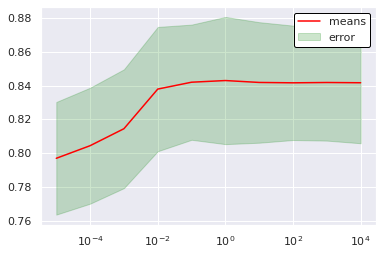

In [20]:
# 2: Кросс-валидация

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

grid = np.power(10, np.arange(-5, 5, dtype = 'float'))\

parameters = {'C' : grid}

CV_model = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = parameters,
    scoring = 'roc_auc',
    n_jobs = -1
)

CV_model.fit(X_train, y_train)

means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']

plt.xscale('log')
plt.plot(grid, means, color = 'red', label = 'means')
plt.fill_between(grid, means - 2 * error, means + 2 * error, color = 'green', alpha = 0.2, label = 'error')
legend_box = plt.legend(framealpha = 1).get_frame()
legend_box.set_facecolor('white')
legend_box.set_edgecolor('black')
plt.show()

In [21]:
# 2.1: test

predicted_test = CV_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predicted_test)

0.8433309742863884

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

C: 1e-1
Test_roc_auc: 0.84

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [22]:
import catboost

In [72]:
# 1: Разделение выборки на train/valid
X = data[num_cols + cat_cols]


X_train, X_valid, y_train, y_valid = train_test_split(data, y, train_size = 0.8, random_state = 42)

In [94]:
# 2.1: Подготовка сетки параметров

nums = np.arange(70, 200, 5)

grid = {
    "num_trees" : nums
}

model = catboost.CatBoostClassifier(
    #cat_features = cat_cols, 
    silent = True, 
    eval_metric='AUC:hints=skip_train~false')

model.grid_search(grid, X_train, y_train, plot = True, refit = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.863889405
bestIteration = 69

0:	loss: 0.8638894	best: 0.8638894 (0)	total: 363ms	remaining: 9.08s

bestTest = 0.8640855198
bestIteration = 70

1:	loss: 0.8640855	best: 0.8640855 (1)	total: 657ms	remaining: 7.89s

bestTest = 0.8652656496
bestIteration = 79

2:	loss: 0.8652656	best: 0.8652656 (2)	total: 977ms	remaining: 7.49s

bestTest = 0.8656303545
bestIteration = 83

3:	loss: 0.8656304	best: 0.8656304 (3)	total: 1.39s	remaining: 7.64s

bestTest = 0.8659744156
bestIteration = 89

4:	loss: 0.8659744	best: 0.8659744 (4)	total: 1.77s	remaining: 7.44s

bestTest = 0.8659744156
bestIteration = 89

5:	loss: 0.8659744	best: 0.8659744 (4)	total: 2.16s	remaining: 7.21s

bestTest = 0.8664767449
bestIteration = 98

6:	loss: 0.8664767	best: 0.8664767 (6)	total: 2.58s	remaining: 6.99s

bestTest = 0.8664767449
bestIteration = 98

7:	loss: 0.8664767	best: 0.8664767 (6)	total: 2.99s	remaining: 6.72s

bestTest = 0.8664767449
bestIteration = 98

8:	loss: 0.8664767	best: 0.8664767 (6)	total

{'params': {'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,


In [97]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 8 to 3300
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1055 non-null   int64  
 1   MonthlySpending           1055 non-null   float64
 2   TotalSpent                1055 non-null   float64
 3   Sex                       1055 non-null   object 
 4   IsSeniorCitizen           1055 non-null   int64  
 5   HasPartner                1055 non-null   object 
 6   HasChild                  1055 non-null   object 
 7   HasPhoneService           1055 non-null   object 
 8   HasMultiplePhoneNumbers   1055 non-null   object 
 9   HasInternetService        1055 non-null   object 
 10  HasOnlineSecurityService  1055 non-null   object 
 11  HasOnlineBackup           1055 non-null   object 
 12  HasDeviceProtection       1055 non-null   object 
 13  HasTechSupportAccess      1055 non-null   object 
 14  HasOnlin

In [100]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8428756782259967

In [26]:
model.predict_proba(X_valid)[:, 1]

array([9.98625986e-01, 1.35116964e-04, 1.13766152e-04, ...,
       3.20323049e-04, 9.99500193e-01, 9.98707578e-01])

In [34]:
best_model = model_2

In [36]:
X_test_1 = pd.read_csv('../test.csv')
submission = pd.read_csv('../submission.csv')

In [55]:
best_model.predict_proba(X_test_1)

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature Churn is present in model but not in pool.

In [57]:
X_train.shape

(4218, 20)

In [58]:
X_test_1.shape

(1761, 19)

In [41]:
submission['Churn'] = best_model.predict_proba(X_test_1)[:,1]

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature Churn is present in model but not in pool.

In [39]:
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5
